## Feature Engineering:
<b>
Feature engineering is the process of creating new features from existing ones or transforming existing features to improve the performance of a machine learning model. It
involves selecting, modifying, or creating features to enhance the model's ability to learn patterns from the data. Effective feature engineering can lead to better model performance,
faster training times, and improved interpretability.
</b>

### Transformation: 
- It includes transforming data through extraction, scaling, and other techniques to help
models capture patterns and relationships.

### Selection: 
- Choosing relevant features improves model simplicity, interpretability, and generalization by
reducing noise and redundancy.

### Creation: 
- New features can be engineered to capture important relationships or patterns not apparent in the
original data.

### Missing Data: 
- Handling missing values through techniques like imputation maintains data integrity.

### Categorical Variables: 
- Encoding categorical variables as numerical values enables their use in machine
learning algorithms.

### Interaction Features: 
- Combining existing features to capture interactions between variables can enhance model performance.

### Domain Expertise: 
- Feature engineering often requires domain knowledge to make informed decisions about creating meaningful features.

### Impact: 
- Effective feature engineering can significantly enhance model accuracy and robustness.

### Experimentation: 
- Iterative experimentation with different feature engineering techniques is key to finding optimal features for a given problem and dataset.

### Data Set

In [ ]:
li = [100, 200, 150, 300,180]

In [2]:
li

[100, 200, 150, 300, 180]

In [3]:
import pandas as pd
df = pd.DataFrame(li, columns=['cost'])
df

,cost
0,100
1,200
2,150
3,300
4,180


# Techniques to perform Feature Transformation:

#### Normalization: <b>
#### Standardization <br>
#### Log Transformation <br>
#### Robust Scaler <br>
#### Max Absolute Scaler


### Normalization / min max scaler:

- Python Implementation:<br>
from sklearn.preprocessing import MinMaxScaler<br>
scaler = MinMaxScaler() <br>

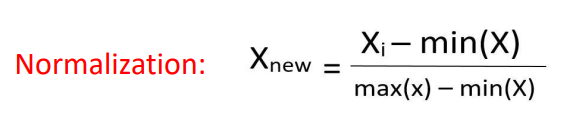

In [4]:
min_cost = df.cost.min()
max_cost = df.cost.max()

In [5]:
min_cost

100

In [6]:
max_cost

300

In [7]:
# Manual equation
df['cost_norm_manual'] = (df.cost - min_cost ) / (max_cost - min_cost)

In [8]:
df.head()

,cost,cost_norm_manual
0,100,0.00
1,200,0.50
2,150,0.25
3,300,1.00
4,180,0.40


In [9]:
# Using Python Library
from sklearn.preprocessing import MinMaxScaler
mmx = MinMaxScaler() #feature_range=(2,5)

In [10]:
df['cost_norm_sklearn'] = mmx.fit_transform(df[['cost']])

In [11]:
df.head()

,cost,cost_norm_manual,cost_norm_sklearn
0,100,0.00,0.00
1,200,0.50,0.50
2,150,0.25,0.25
3,300,1.00,1.00
4,180,0.40,0.40


## Standardization / standard scaler

- Python Implementation: <br>
from sklearn.preprocessing import StandardScaler <br>
scaler = StandardScaler() <br>

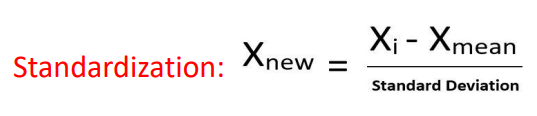

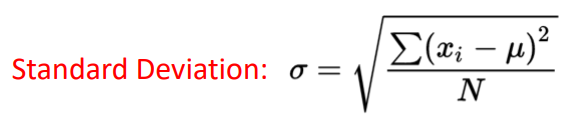


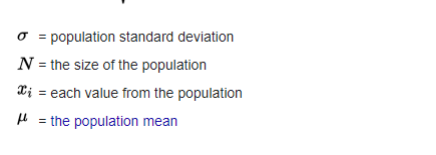

In [12]:
mean_cost = df.cost.mean()
std = df.cost.std()

In [14]:
# Using Equation
df['cost_std_manual'] = (df['cost'] - mean_cost) / std

In [15]:
df.head()

,cost,cost_norm_manual,cost_norm_sklearn,cost_std_manual
0,100,0.00,0.00,-1.161738
1,200,0.50,0.50,0.189120
2,150,0.25,0.25,-0.486309
3,300,1.00,1.00,1.539978
4,180,0.40,0.40,-0.081051


In [16]:
# Using Python Library
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

In [17]:
df['cost_std_sklearn'] = scaler.fit_transform(df[['cost']])

In [18]:
df

,cost,cost_norm_manual,cost_norm_sklearn,cost_std_manual,cost_std_sklearn
0,100,0.00,0.00,-1.161738,-1.298863
1,200,0.50,0.50,0.189120,0.211443
2,150,0.25,0.25,-0.486309,-0.543710
3,300,1.00,1.00,1.539978,1.721748
4,180,0.40,0.40,-0.081051,-0.090618


In [19]:
# Standard Deviation When ddof = 0
std_dof = df.cost.std(ddof=0)

In [20]:
std_dof

66.2117814289874

In [21]:
# Standard Deviation When ddof = 1
std_dof1 = df.cost.std(ddof=1)
std_dof1

74.02702209328699

In [22]:
df

,cost,cost_norm_manual,cost_norm_sklearn,cost_std_manual,cost_std_sklearn
0,100,0.00,0.00,-1.161738,-1.298863
1,200,0.50,0.50,0.189120,0.211443
2,150,0.25,0.25,-0.486309,-0.543710
3,300,1.00,1.00,1.539978,1.721748
4,180,0.40,0.40,-0.081051,-0.090618


In [23]:
df['cost_std_manual2'] = (df['cost'] - mean_cost) / std_dof1

In [24]:
df

,cost,cost_norm_manual,cost_norm_sklearn,cost_std_manual,cost_std_sklearn,cost_std_manual2
0,100,0.00,0.00,-1.161738,-1.298863,-1.161738
1,200,0.50,0.50,0.189120,0.211443,0.189120
2,150,0.25,0.25,-0.486309,-0.543710,-0.486309
3,300,1.00,1.00,1.539978,1.721748,1.539978
4,180,0.40,0.40,-0.081051,-0.090618,-0.081051


In [25]:
df['cost_std_manual2'] = (df['cost'] - mean_cost) / std_dof

In [26]:
df

,cost,cost_norm_manual,cost_norm_sklearn,cost_std_manual,cost_std_sklearn,cost_std_manual2
0,100,0.00,0.00,-1.161738,-1.298863,-1.298863
1,200,0.50,0.50,0.189120,0.211443,0.211443
2,150,0.25,0.25,-0.486309,-0.543710,-0.543710
3,300,1.00,1.00,1.539978,1.721748,1.721748
4,180,0.40,0.40,-0.081051,-0.090618,-0.090618


# Log Transformation

In [27]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

In [28]:
fc = FunctionTransformer(np.log1p)
df['cost_fc'] = fc.fit_transform(df[['cost']])
df

,cost,cost_norm_manual,cost_norm_sklearn,cost_std_manual,cost_std_sklearn,cost_std_manual2,cost_fc
0,100,0.00,0.00,-1.161738,-1.298863,-1.298863,4.615121
1,200,0.50,0.50,0.189120,0.211443,0.211443,5.303305
2,150,0.25,0.25,-0.486309,-0.543710,-0.543710,5.017280
3,300,1.00,1.00,1.539978,1.721748,1.721748,5.707110
4,180,0.40,0.40,-0.081051,-0.090618,-0.090618,5.198497


In [29]:
df['fc_np'] = np.log1p(df[['cost']])

In [30]:
df

,cost,cost_norm_manual,cost_norm_sklearn,cost_std_manual,cost_std_sklearn,cost_std_manual2,cost_fc,fc_np
0,100,0.00,0.00,-1.161738,-1.298863,-1.298863,4.615121,4.615121
1,200,0.50,0.50,0.189120,0.211443,0.211443,5.303305,5.303305
2,150,0.25,0.25,-0.486309,-0.543710,-0.543710,5.017280,5.017280
3,300,1.00,1.00,1.539978,1.721748,1.721748,5.707110,5.707110
4,180,0.40,0.40,-0.081051,-0.090618,-0.090618,5.198497,5.198497


## Robust Scaler / Max Absolute Scaler:

- Python Implementation: <br>
from sklearn.preprocessing import MaxAbsScaler <br>
scaler = MaxAbsScaler() <br>

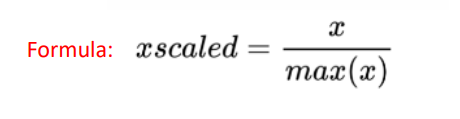

In [31]:
from sklearn.preprocessing import MaxAbsScaler

In [32]:
mx = MaxAbsScaler()

In [33]:
df['mx_abs'] = mx.fit_transform(df[['cost']])

In [34]:
df

,cost,cost_norm_manual,cost_norm_sklearn,cost_std_manual,cost_std_sklearn,cost_std_manual2,cost_fc,fc_np,mx_abs
0,100,0.00,0.00,-1.161738,-1.298863,-1.298863,4.615121,4.615121,0.333333
1,200,0.50,0.50,0.189120,0.211443,0.211443,5.303305,5.303305,0.666667
2,150,0.25,0.25,-0.486309,-0.543710,-0.543710,5.017280,5.017280,0.500000
3,300,1.00,1.00,1.539978,1.721748,1.721748,5.707110,5.707110,1.000000
4,180,0.40,0.40,-0.081051,-0.090618,-0.090618,5.198497,5.198497,0.600000


# Power Transformer (box cox)

In [35]:
from scipy.stats import boxcox
df['box cox'],_ = boxcox(df['cost']+1)

In [36]:
df

,cost,cost_norm_manual,cost_norm_sklearn,cost_std_manual,cost_std_sklearn,cost_std_manual2,cost_fc,fc_np,mx_abs,box cox
0,100,0.00,0.00,-1.161738,-1.298863,-1.298863,4.615121,4.615121,0.333333,5.609162
1,200,0.50,0.50,0.189120,0.211443,0.211443,5.303305,5.303305,0.666667,6.642560
2,150,0.25,0.25,-0.486309,-0.543710,-0.543710,5.017280,5.017280,0.500000,6.205968
3,300,1.00,1.00,1.539978,1.721748,1.721748,5.707110,5.707110,1.000000,7.276620
4,180,0.40,0.40,-0.081051,-0.090618,-0.090618,5.198497,5.198497,0.600000,6.481391
